# Electromiografía: Cuantificación de la fatiga muscular 
### Flores Oliva Alejandro Elliot
#### Licenciatura en Física Biomédica en Ciencias Biológicas , Facultad de Ciencias, Universidad Nacional Autónoma de México.

## Índice:

[1. Configuración/Diseño del notebook. ](#1)

[2. Extraer y graficar los datos. ](#2)

[3. Filtración de las grabaciones.](#3)

[4. Filtro Butterworth de paso banda.](#4)

[5. Valor absoluto de EMG.](#5)

[6. Análisis de registros mediante cuantificaciones. ](#6)

<a id='1'></a>
## Configuración/Diseño del notebook.

<a id='2'></a>
## Extraer y graficar los datos.

<a id='3'></a>
## Filtración de las grabaciones.

<a id='4'></a>
## Filtro Butterworth de paso banda.

<a id='5'></a>
## Valor absoluto de EMG.

<a id='6'></a>
## Análisis de registros mediante cuantificaciones.

In [1]:
#Importamos las librerías necesarias para este notebook.
import scipy.io.wavfile         #El módulo de “wave”proporciona una interfaz conveniente para el formato de sonido WAV.
import numpy as np              #Es una biblioteca para crear vectores y matrices grandes multidimensionales.
import matplotlib.pyplot as plt #Nos provee de un framework de gráficos parecido a MATLAB.
from scipy.signal import butter, lfilter, filtfilt #Herramientas de procesamiento de señales, funciones de filtrado, algoritmos de interpolación.
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
import math            #Permite usar funciones matemáticas definidas en el estándar de C.
import scipy as sc     #Módulos para álgebra lineal, integración, interpolación, FFT, procesamiento de señales y de imagen, etc.
from scipy import signal 
import wave            #El módulo proporciona una interfaz para el formato de sonido WAV.

Número de canales (estéreo o mono) : 2
Longitud de onda en segundos 181.4523
[0.000000e+00 1.000000e-04 2.000000e-04 ... 1.814520e+02 1.814521e+02
 1.814522e+02]


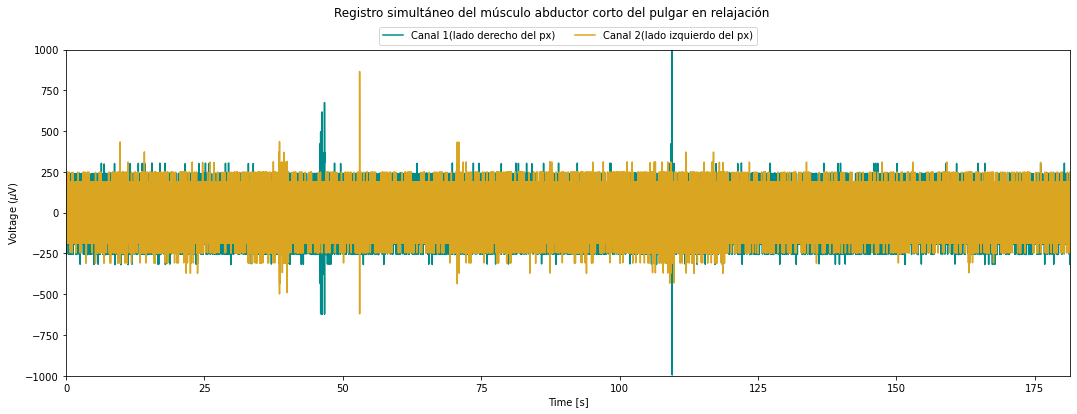

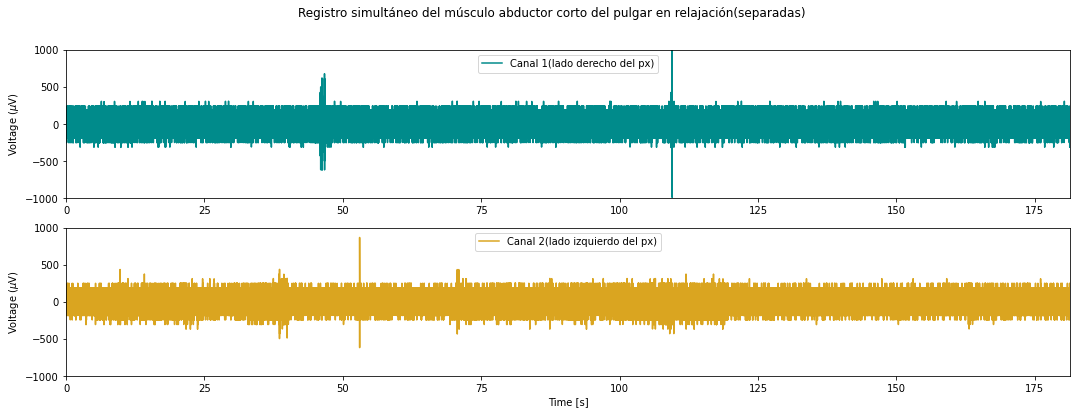

In [2]:
Folder="../Parkinson Notebooks/BYB/"    #Ubicar el folder donde se encuentra nuestro registro de EMG
rate,fileData=scipy.io.wavfile.read("../Parkinson Notebooks/BYB/29-01/Registro_AbdCorto_Relajación.wav") #Abrir nuestro archivo wav

#Imprimimos los datos que nos van a funcionar para graficar ambos canales.
print("Número de canales (estéreo o mono) : "+str(fileData.shape[1])) 
print("Longitud de onda en segundos "+str(fileData.shape[0] / rate))

#wav Número de canales 
channel1=fileData[:,0]                                  #Izquierda
channel2=fileData[:,1]                                  #Derecha
N = fileData.shape[0]                                   #Número de datos/puntos
EMGtiempo = np.arange(0, float(fileData.shape[0]), 1)/rate   #creamos una variable de tiempo en segundos 
print(EMGtiempo)

frec = 1/np.mean(np.diff(EMGtiempo))

#Graficamos EMG
plt.figure(figsize=(18,6))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación')

#Graficamos en conjunto

plt.plot(EMGtiempo,channel1, color='darkcyan',label="Canal 1(lado derecho del px)")
plt.plot(EMGtiempo,channel2, color='goldenrod',label="Canal 2(lado izquierdo del px)")
plt.xlabel('Time [s]')
plt.ylabel('Voltage ($\mu$V)')
plt.ylim(-1000,1000)
plt.xlim(0,max(EMGtiempo))
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.show()

#Graficamos EMG
plt.figure(figsize=(18,6))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)')

#Graficamos canal 1
plt.subplot(211)
plt.xlim(0,max(EMGtiempo))
plt.ylim(-1000,1000)
plt.plot(EMGtiempo, channel1, color='darkcyan',label="Canal 1(lado derecho del px)")
plt.legend(loc="upper center", bbox_to_anchor=[0.5, 1],ncol=2, fontsize="medium")
#plt.xlabel('Time [s]')
plt.ylabel('Voltage ($\mu$V)')


#Graficamos canal 2
plt.subplot(212)
plt.xlim(0,max(EMGtiempo))
plt.ylim(-1000,1000)
plt.plot(EMGtiempo, channel2, color='goldenrod',label="Canal 2(lado izquierdo del px)")
plt.xlabel('Time [s]')
plt.ylabel('Voltage ($\mu$V)')
plt.legend(loc="upper center", bbox_to_anchor=[0.5, 1],ncol=2, fontsize="medium")
plt.show()

In [3]:
# Filtro Butterworth de paso banda a 10-400Hz.
b, a = butter(2, ([10, 400]/(frec/2)), btype = 'bandpass')
#[b, a] = butter (n, Wn, ftype) diseña un filtro Butterworth de paso bajo, paso alto, paso banda o supresión de banda.
#La señal depende del valor de ftype y el número de elementos de Wn.
 
dataf1 = filtfilt(b, a, channel1)
dataf2 = filtfilt(b, a, channel2)

Text(0, 0.5, 'Voltaje ($\\mu$V)')

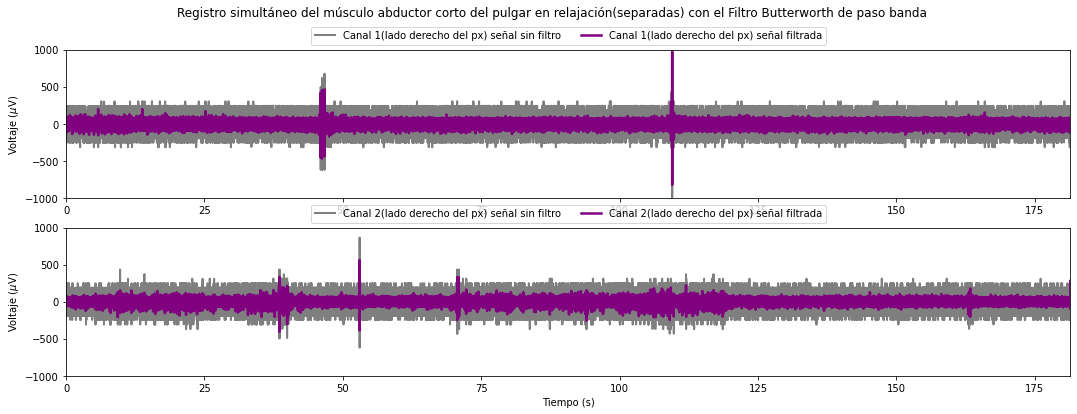

In [4]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas) con el Filtro Butterworth de paso banda')

plt.subplot(211)
plt.plot(EMGtiempo,channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")           #Trazo de la señal con color.
plt.plot(EMGtiempo,dataf1, 'purple', linewidth=2.5,label="Canal 1(lado derecho del px) señal filtrada")                       #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
#plt.xlabel('Tiempo (s)')                                                 #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

plt.subplot(212)
plt.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado derecho del px) señal sin filtro")           #Trazo de la señal con color.
plt.plot(EMGtiempo,dataf2, 'purple', linewidth=2.5,label="Canal 2(lado derecho del px) señal filtrada")                       #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

Text(0, 0.5, 'Voltaje ($\\mu$V)')

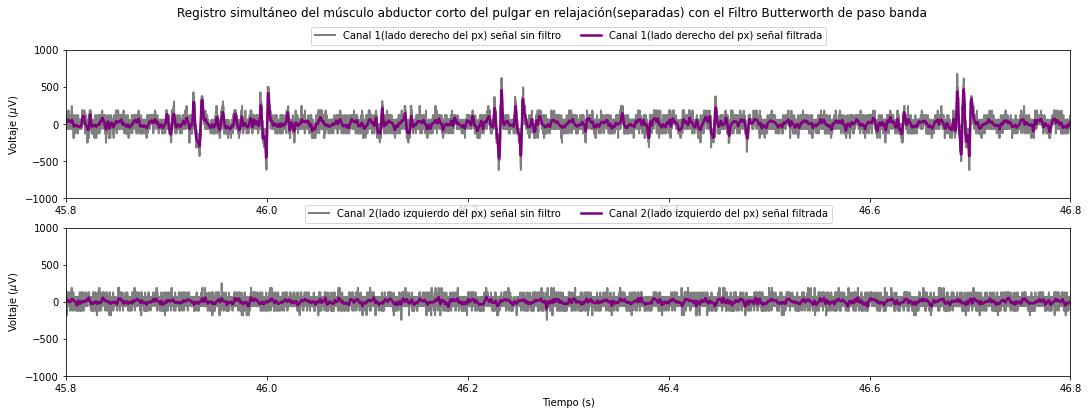

In [5]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas) con el Filtro Butterworth de paso banda')

plt.subplot(211)
plt.plot(EMGtiempo,channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")           #Trazo de la señal con color.
plt.plot(EMGtiempo,dataf1, 'purple', linewidth=2.5,label="Canal 1(lado derecho del px) señal filtrada")                       #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(45.8,46.8)                                                           #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
#plt.xlabel('Tiempo (s)')                                                 #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

plt.subplot(212)
plt.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro")           #Trazo de la señal con color.
plt.plot(EMGtiempo,dataf2, 'purple', linewidth=2.5,label="Canal 2(lado izquierdo del px) señal filtrada")                       #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(45.8,46.8)                                                           #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

Text(0, 0.5, 'Voltaje ($\\mu$V)')

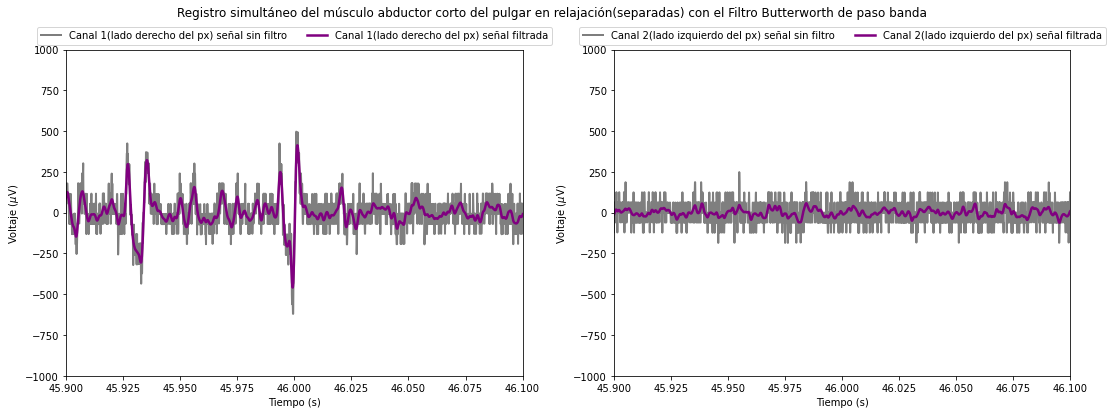

In [6]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas) con el Filtro Butterworth de paso banda')

plt.subplot(121)
plt.plot(EMGtiempo,channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")           #Trazo de la señal con color.
plt.plot(EMGtiempo,dataf1, 'purple', linewidth=2.5,label="Canal 1(lado derecho del px) señal filtrada")                       #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(45.9,46.1)                                                           #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                 #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

plt.subplot(122)
plt.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro")           #Trazo de la señal con color.
plt.plot(EMGtiempo,dataf2, 'purple', linewidth=2.5,label="Canal 2(lado izquierdo del px) señal filtrada")                       #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(45.9,46.1)                                                           #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

In [ ]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=4, ncols=1, sharex= False, sharey= True, figsize = (20,10))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas) con el Filtro Butterworth de paso banda')

# Trazar datos sin procesar
ax1.plot(EMGtiempo,channel1 , 'black')
ax1.set_title('Canal 1(lado derecho del px) señal sin filtrar', fontsize=20)
ax1.set_xlim(45.8,46.8)                                                
ax1.set_ylim(-1000,1000)
#ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Voltaje ($\mu$V)')

# Trazar datos filtrados
ax2.plot(EMGtiempo, dataf1, 'purple')
ax2.set_title('Canal 1(lado derecho del px) con filtro paso banda de 10-400 Hz', fontsize=20)
ax2.set_xlim(45.8,46.8)
ax2.set_ylim(-1000,1000)
#ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Voltaje ($\mu$V)')

# Trazar datos sin procesar
ax3.plot(EMGtiempo,channel2 , 'black')
ax3.set_title('Canal 2(lado izquierdo del px) señal sin filtrar', fontsize=20)
ax3.set_xlim(45.8,46.8)                                               
ax3.set_ylim(-1000,1000)
#ax3.set_xlabel('Tiempo (s)')
ax3.set_ylabel('Voltaje ($\mu$V)')

# Trazar datos filtrados
ax4.plot(EMGtiempo, dataf2, 'purple')
ax4.set_title('Canal 2(lado izquierdo del px) con filtro paso banda de 10-400 Hz', fontsize=20)
ax4.set_xlim(45.8,46.8)
ax4.set_ylim(-1000,1000)
ax4.set_xlabel('Tiempo (s)')
ax4.set_ylabel('Voltaje ($\mu$V)')


# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex= False, sharey= True, figsize = (20,10))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)')
# Rectificar la señal EMG
AbsSeñal1 = np.absolute(dataf1)                                                          #Calcula el valor absoluto por elementos.
AbsSeñal2 = np.absolute(dataf2) 
Abstiempo1=np.linspace(0, len(AbsSeñal1), num=len(AbsSeñal1))
Abstiempo2=np.linspace(0, len(AbsSeñal2), num=len(AbsSeñal2))

# Trazar datos rectificados
ax1.set_title('Canal 1(lado derecho del px) señal sin filtrar') #Título.
ax1.set_xlabel('Tiempo (s)')                                                              #Título del eje horizontal.
ax1.set_ylabel('Voltaje ($\mu$V)')                                                        #Título del eje vertical.
ax1.plot(EMGtiempo,AbsSeñal1,'black')                                                   #Graficación y color de la señal.
ax1.set_xlim(0,max(EMGtiempo))

# Trazar datos rectificados                                                            
ax2.set_title('Canal 2(lado izquierdo del px) señal sin filtrar') #Título.
ax2.set_xlabel('Tiempo (s)')                                                              #Título del eje horizontal.
ax2.set_ylabel('Voltaje ($\mu$V)')                                                        #Título del eje vertical.
ax2.plot(EMGtiempo,AbsSeñal2,'black')                                                   #Graficación y color de la señal.
ax2.set_xlim(0,max(EMGtiempo))

plt.show()

In [ ]:
# Filtro Butterworth de paso bajo para detección de envolvente
lowp = 8     
sfrec =1/np.mean(np.diff(EMGtiempo))
low_pass = lowp/sfrec
b, a = sc.signal.butter(4, low_pass, btype='lowpass')
datafrle1 = filtfilt(b, a, AbsSeñal1)
datafrle2 = filtfilt(b, a, AbsSeñal2)

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex= False, sharey= True, figsize = (20,10))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)')

#Trazar señal EMG rectificada con detección de envolvente superpuesta con filtro de paso bajo
ax1.set_title('Envolvente superpuesta con filtro de paso bajo del EMG del músculo abductor corto del pulgar en relajación (lado derecho)')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Voltaje ($\mu$V)')
ax1.plot(EMGtiempo,AbsSeñal1, 'gray', alpha=0.4,label="Canal 1(lado derecho del px) absoluto señal")
ax1.plot(EMGtiempo,datafrle1*3, 'purple', linewidth=2.5,label="Canal 1(lado derecho del px) envolvente") 
ax1.legend(loc="upper center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
ax1.set_xlim(0,max(EMGtiempo))

#Trazar señal EMG rectificada con detección de envolvente superpuesta con filtro de paso bajo
ax2.set_title('Envolvente superpuesta con filtro de paso bajo del EMG del músculo abductor corto del pulgar en relajación (lado izquierdo)')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Voltaje ($\mu$V)')
ax2.plot(EMGtiempo,AbsSeñal2, 'gray', alpha=0.4, label="Canal 2(lado izquierdo del px) absoluto señal")
ax2.plot(EMGtiempo,datafrle2*3, 'purple', linewidth=2.5,label="Canal 2(lado izquierdo del px) envolvente")
ax2.legend(loc="upper center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
ax2.set_xlim(0,max(EMGtiempo))

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

In [ ]:
#Antes de trazar esta envolvente es necesario solo correr la 'Envolvente superpuesta con filtro de paso bajo del EMG del músculo
#de pantorrilla durante elevaciones repetidas con una frecuencia de corte superior a 8 Hz, o la ideal para trabajar.
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex= False, sharey= True, figsize = (20,10))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)')

#Trazar solo la envolvente para determinar el umbral para detectar contracciones
#ax1.set_figure(figsize=(18,6))
ax1.set_title('Envolvente para determinar el umbral para detectar contracciones en la señal del músculo abductor corto del pulgar en relajación(lado derecho)')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Voltaje ($\mu$V)')
ax1.plot(EMGtiempo,datafrle1, 'purple', linewidth=2.0)
ax1.plot(EMGtiempo,datafrle1, 'purple', label = "Envolvente superpuesta con filtro de paso bajo")
ax1.axhline(y=40, color='green',linewidth=2.0, linestyle='-.', label = "Umbral 35") #Umbral potencial
ax1.legend(loc="upper center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
ax1.set_xlim(0,max(EMGtiempo))

#Trazar solo la envolvente para determinar el umbral para detectar contracciones
#ax2.set_figure(figsize=(18,6))
ax2.set_title('Envolvente para determinar el umbral para detectar contracciones en la señal del músculo abductor corto del pulgar en relajación(lado izquierdo)')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Voltaje ($\mu$V)')
ax2.plot(EMGtiempo,datafrle2, 'purple', linewidth=2.0)
ax2.plot(EMGtiempo,datafrle2, 'purple', label = "Envolvente superpuesta con filtro de paso bajo")
ax2.axhline(y=40, color='green',linewidth=2.0, linestyle='-.', label = "Umbral 35") #Umbral potencial
ax2.legend(loc="upper center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
ax2.set_xlim(0,max(EMGtiempo))

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

In [ ]:
threshold = 40 #Umbral
cstarts1= [] #Tiempos de inicio 
for i in range(1, len(datafrle1)):
    if datafrle1[i-1] < threshold and datafrle1[i] >= threshold:
        cstarts1.append(i)
print('Tiempo de inicio del umbral del canal 1 (lado derecho):')       
print(cstarts1) 

cstarts2= [] #Tiempos de inicio 
for i in range(1, len(datafrle2)):
    if datafrle2[i-1] < threshold and datafrle2[i] >= threshold:
        cstarts2.append(i)
print('Tiempo de inicio del umbral del canal 2 (lado izquierdo):')       
print(cstarts2)

In [ ]:
threshold = 40 #Umbral
cstops1 = [] #Tiempos de finaclización
for i in range(1, len(datafrle1)):
    if datafrle1[i-1] >= threshold and datafrle1[i] < threshold:
        cstops1.append(i)
print('Tiempo de finalización del umbral del canal 1 (lado derecho):')         
print(cstops1)

cstops2 = [] #Tiempos de finaclización
for i in range(1, len(datafrle2)):
    if datafrle2[i-1] >= threshold and datafrle2[i] < threshold:
        cstops2.append(i)
print('Tiempo de finalización del umbral del canal 2 (lado izquierdo):')         
print(cstops2)

In [ ]:
#Canal 1 (derecho)
starts1=[]
for n in range(0, len(cstarts1)):
    starttime = cstarts1[n]/(1/np.mean(np.diff(EMGtiempo)))
    starts1.append(starttime)
print('Inicio:')     
print(starts1)

#Canal 2(izquierdo)
starts2=[]
for n in range(0, len(cstarts2)):
    starttime = cstarts2[n]/(1/np.mean(np.diff(EMGtiempo)))
    starts2.append(starttime)
print('Inicio:')     
print(starts2)

#Canal 1 (derecho)
stops1=[]
for n in range(0, len(cstops1)):
    stoptime = cstops1[n]/(1/np.mean(np.diff(EMGtiempo)))
    stops1.append(stoptime)
print('Final:')     
print(stops1)

#Canal 2(izquierdo)
stops2=[]
for n in range(0, len(cstops2)):
    stoptime = cstops2[n]/(1/np.mean(np.diff(EMGtiempo)))
    stops2.append(stoptime)
print('Final:')     
print(stops2)

In [ ]:
#Trazar envolvente con tiempos de inicio y finalización de la contracción marcados por líneas discontinuas
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex= False, sharey= True, figsize = (20,10))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)')

ax1.set_title('Envolvente con tiempos de inicio y finalización de la contracción marcados por líneas discontinuas en la señal del músculo abductor corto del pulgar en relajación')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Voltaje ($\mu$V)')
ax1.plot(EMGtiempo, datafrle1, 'purple', linewidth=2.0, label = "Envolvente superpuesta con filtro de paso bajo")
ax1.set_xlim(0,max(EMGtiempo));
#Para la detección de tiempo de inicio.
for n in range(0, len(starts1)):
    ax1.axvline(x=starts1[n], color='red',linewidth=2.0, linestyle='-.', label="Inicio")
    
#Para la detección de tiempo de finalización.    
for n in range(0, len(stops1)):
    ax1.axvline(x=stops1[n], color='gold',linewidth=2.0, linestyle='-.',label="Finalización")
    

ax2.set_title('Envolvente con tiempos de inicio y finalización de la contracción marcados por líneas discontinuas en la señal del músculo abductor corto del pulgar en relajación')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Voltaje ($\mu$V)')
ax2.plot(EMGtiempo, datafrle2, 'purple', linewidth=2.0, label = "Envolvente superpuesta con filtro de paso bajo")
ax2.set_xlim(0,max(EMGtiempo));

#Para la detección de tiempo de inicio.
for n in range(0, len(starts2)):
    ax2.axvline(x=starts2[n], color='red',linewidth=2.0, linestyle='-.', label="Inicio")
    
#Para la detección de tiempo de finalización.    
for n in range(0, len(stops2)):
    ax2.axvline(x=stops2[n], color='gold',linewidth=2.0, linestyle='-.',label="Finalización")
    
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

In [ ]:





202
2

